# 3.Data Download

In [ ]:
from torchvision import datasets, transforms

train_dataset = datasets.FashionMNIST(
                  root='FashionMNIST_data', # download 경로
                  train=True,  # training data 반환
                  # [0, 255] 범위 내의 PIL Image나 NumPy ndarray를 torch.FloatTensor로 변환
                  # image pixel 값[0, 255]을 [0.0, 1.0] 범위로 비례하여 조정(scale)
                  transform=transforms.ToTensor(),
                  # 해당 경로(root)에 MNIST data가 없다면 다운로드 받겠다.
                  download=True)
test_dataset = datasets.FashionMNIST(
                  root='FashionMNIST_data',
                  train=False,  # test data 반환
                  transform=transforms.ToTensor(),
                  download=True)

print(f'type(train_dataset) = {type(train_dataset)}, len(train_dataset) = {len(train_dataset)}')
print(f'type(test_dataset) = {type(test_dataset)}, len(test_dataset) = {len(test_dataset)}')

100%|██████████| 26421880/26421880 [00:07<00:00, 3405008.24it/s]


Extracting FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 100905.15it/s]


Extracting FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1028177.94it/s]


Extracting FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7260348.69it/s]

Extracting FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST_data/FashionMNIST/raw

type(train_dataset) = <class 'torchvision.datasets.mnist.FashionMNIST'>, len(train_dataset) = 60000
type(test_dataset) = <class 'torchvision.datasets.mnist.FashionMNIST'>, len(test_dataset) = 10000


## 3-1.Data 확인

type(image) = <class 'torch.Tensor'>, type(label) = <class 'int'>
image.shape = torch.Size([1, 28, 28]), label = 9
torch_image.shape = torch.Size([28, 28])


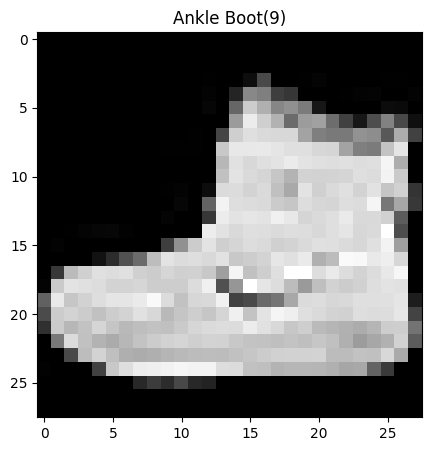

In [ ]:
import matplotlib.pyplot as plt

# 각 클래스의 이름을 숫자와 매칭하여 저장 (총 10개)
classes = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coar',
           5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}


image, label = train_dataset[0]
print(f'type(image) = {type(image)}, type(label) = {type(label)}')
print(f'image.shape = {image.shape}, label = {label}')

# 차원이 1인 차원을 제거
# pytorch에서 불러오는 MNIST 데이터의 경우 [1, 28, 28]로 구성된다.
# 따라서 1을 없애야 이미지를 그릴 수 있다.
torch_image = image.squeeze()
print(f'torch_image.shape = {torch_image.shape}')

plt.figure(figsize=(5, 5))
plt.imshow(torch_image.squeeze().numpy(), cmap='gray')
plt.title(f'{classes[label]}({label})') # 정답을 title로
plt.show()

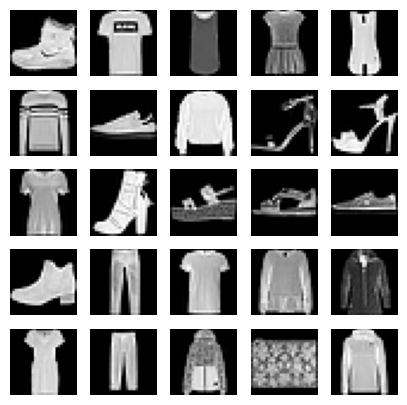

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for i in range(0, 25):
  plt.subplot(5, 5, i+1) # row, col, index(1부터)
  image, label = train_dataset[i]
  plt.imshow(image.squeeze().numpy(), 'gray')
  plt.axis('off') # 축 제거

plt.show()

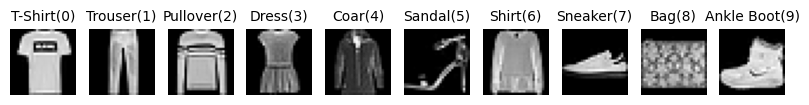

In [ ]:
import matplotlib.pyplot as plt

# 각 클래스의 이름을 숫자와 매칭하여 저장 (총 10개)
classes = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coar',
           5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}
kind = {}
for k in range(10):
  for i in range(0, len(train_dataset)):
    image, label = train_dataset[i]
    if k == label:
      kind[label]=image
      break

title_font = {
    'fontsize': 10
}

plt.figure(figsize=(10, 10))
for label, image in kind.items():
  plt.subplot(1, 10, label+1) # row, col, index(1부터)
  plt.title(f'{classes[label]}({label})', fontdict=title_font)
  plt.imshow(image.squeeze().numpy(), 'gray')
  plt.axis('off') # 축 제거

plt.show()

# 4.data 분리 (train/validation)

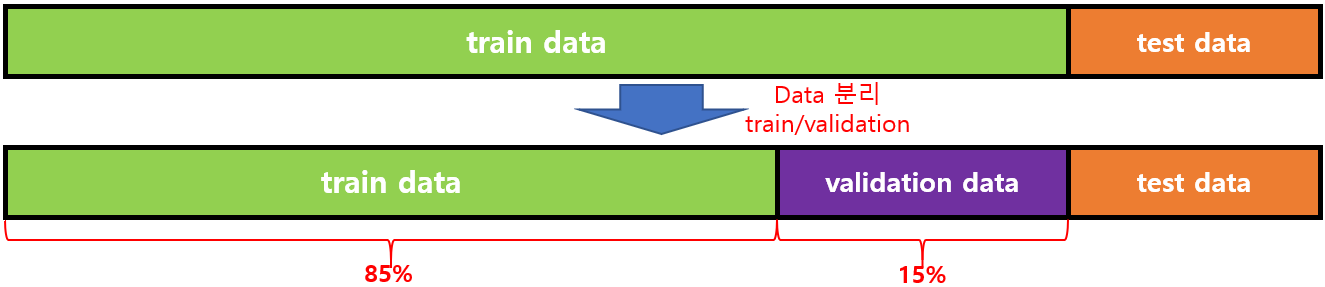

In [ ]:
import torch.utils as utils

tot_train_size = len(train_dataset)
train_size = int(tot_train_size * 0.85)
validation_size = tot_train_size - train_size # 15% 를 validation data로 분리

# data set의 분리
train_dataset, validation_dataset = utils.data.random_split(
                                    train_dataset,
                                    [train_size, validation_size])
# len(train_dataset): 6,0000 * 0.85 = 51,000
# len(validation_dataset): 6,0000 * 0.15 = 9,000
print(f'tot_train_size = tot_train_size, len(train_dataset) = {len(train_dataset)}, len(validation_dataset) = {len(validation_dataset)}')

tot_train_size = tot_train_size, len(train_dataset) = 51000, len(validation_dataset) = 9000


# 5.model 정의

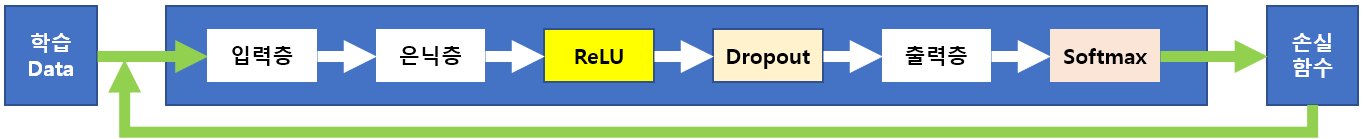

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

#############################################
# Model
class DeepLearningModel(nn.Module):
  def __init__(self):
    super().__init__()
    # architecture를 구성하는 layer 정의
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 256)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.3)
    self.fc2 = nn.Linear(256, 10)

  def forward(self, data):
    # 입력 data에 대해 Feed Forward 수행
    data = self.flatten(data) # 입력층, 2차원 matrix(28x28)를 1차원 vector(784)로
    data = self.fc1(data)     # 은닉층
    data = self.relu(data)    # ReLU (비선형함수)
    data = self.dropout(data) # Dropout (Overfitting 방지)
    logits = self.fc2(data)   # 출력층
    return logits

#############################################
# Batch를 위한 DataLoader 설정
BATCH_SIZE = 32  # batch size 정의

# batch data를 만들기 위해 DataLoader 설정
train_dataset_loader = DataLoader(
      dataset=train_dataset,
      batch_size=BATCH_SIZE,
      shuffle=True)
validation_dataset_loader = DataLoader(
      dataset=validation_dataset,
      batch_size=BATCH_SIZE,
      shuffle=True)
test_dataset_loader = DataLoader(
      dataset=test_dataset,
      batch_size=BATCH_SIZE,
      shuffle=True)

# len(train_dataset): 6,0000 * 0.85 = 51,000
#    len(train_dataset_loader): 51,000 / 32 = 1594
#
# len(validation_dataset): 6,0000 * 0.15 = 9,000
#    len(validation_dataset_loader): 9000 / 32 = 282
#
# len(test_dataset) = 10,000
#    len(test_dataset_loader): 10,000 / 32 = 313
print(f'len(train_dataset_loader): {len(train_dataset_loader)}')
print(f'len(validation_dataset_loader): {len(validation_dataset_loader)}')
print(f'len(test_dataset_loader): {len(test_dataset_loader)}')

#############################################
# model instance 생성
model = DeepLearningModel()

# 손실함수
# 정답이 3개 이상(여기는 10개)인 다중분류에서는
# 일반적으로 CrossEntropyLoss() 를 사용한다,
# CrossEntropyLoss() 에는 Softmax가 포함되어 있다.
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-2)

len(train_dataset_loader): 1594
len(validation_dataset_loader): 282
len(test_dataset_loader): 313


# 6.model 학습 함수 정의

In [ ]:
def model_train(dataloader, model, criterion, optimizer):

  # model을 학습 mode로 ...
  # model parameters((Weight, Bias)를 update하는 mode
  model.train()

  train_loss_sum = train_correct = train_total =0
  total_train_batch = len(dataloader)

  """
  ### Debug ####################################
  index = 0
  ### Debug ####################################
  """

  for images, labels in dataloader:
    # x_train.shape: torch.Size([32, 784])
    x_train = images.view(-1, 28 * 28)
    y_train = labels

    outputs = model(x_train) # model에 대한 예측값 계산
    loss = criterion(outputs, y_train) # 손실함수 계산

    # 역전파(backpropagation)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_sum += loss.item()

    """
    ### Debug ####################################
    if index > 0:
      break
    index += 1

    # 32: batch size
    print(f'images.shape = {images.shape}')    # images.shape = torch.Size([32, 1, 28, 28])
    print(f'labels.shape = {labels.shape}')    # labels.shape = torch.Size([32])
    print(f'x_train.shape = {x_train.shape}')  # x_train.shape = torch.Size([32, 784])
    print(f'y_train.shape = {y_train.shape}')  # y_train.shape = torch.Size([32])
    print(f'outputs.shape = {outputs.shape}')  # outputs.shape = torch.Size([32, 10])
    print(f'y_train = {y_train}')              # tensor([4, 7, 8, 8, 3, 7, 4, 9, 8, 4, 7, 9, 1, 1, 1, 3, 2, 2, 8, 6, 0, 4, 2, 5, 0, 1, 0, 1, 5, 7, 3, 7])
    print(f'outputs[0] = {outputs[0]}')        # outputs[0] = tensor([ 0.0003, -0.0441,  0.0559,  0.0387, -0.0764,  0.0497, -0.0202, -0.0220, -0.0849,  0.1115], grad_fn=<SelectBackward0>)
    print(f'torch.argmax(outputs, 1) = {torch.argmax(outputs, 1)}') # 0.1115 의 index 9 return
                                               # torch.argmax(outputs, 1) = tensor([9, 9, 9, 9, 9, 3, 7, 6, 9, 2, 9, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 7, 3, 9, 9, 7, 9, 9, 6])
    print(f'outputs = {outputs}')
    ### Debug ####################################
    """

    train_total += y_train.size(0) # 32, size(): shape과 동일
    # argmax(tensor, dim=1): dim(열)을 기준(각 행에서)으로 안에 있는 최대값의 위치를 각각 반환
    # item(): tensor에 저장된 값만을 반환
    train_correct += (torch.argmax(outputs, 1) == y_train).sum().item()

  # 학습 data의 평균 오차 계산
  train_avg_loss = train_loss_sum / total_train_batch
  # 학습 data의 평균 정확도 계산
  train_avg_accuracy = 100 * train_correct / train_total

  return (train_avg_loss, train_avg_accuracy)

### Debug ####################################
#model_train(train_dataset_loader, model, criterion, optimizer)
### Debug ####################################

# 7.model 검증 함수 정의

In [ ]:
def model_evaluate(dataloader, model, loss_function, optimizer):

  # model을 평가(추론) mode로 ..
  # model의 parameter를 update 하지 않는 mode
  model.eval()

  # gradient를 계산하는 autograd engine을 비활성화한다.
  # 역전파(Backpropagation)에 필요한 메모리 등을 절약할 수 있어 계산 시 연산 속도가 빨라진다
  with torch.no_grad():
    # 검증 함수에는 역전파(Backpropagation) code가 없다.
    # 이 함수의 목적은 parameter를 학습을 하는 것이 아니라
    # 현재 model의 오차와 정확도를 알아내는 것이다.

    eval_loss_sum = eval_correct = eval_total = 0

    total_eval_batch = len(dataloader)

    for images, labels in dataloader:
      x_eval = images.view(-1, 28, 28)
      y_eval = labels

      outputs = model(x_eval)
      loss = criterion(outputs, y_eval)

      # 역전파(backpropagation) code가 없다.

      eval_loss_sum += loss.item()

      eval_total += y_eval.size(0)
      eval_correct += (torch.argmax(outputs, 1) == y_eval).sum().item()

    # 검증 data의 평균 오차 계산
    eval_avg_loss = eval_loss_sum / total_eval_batch
    # 검증 data의 평균 정확도 계산
    eval_avg_accuracy = 100 * eval_correct / eval_total

    return (eval_avg_loss, eval_avg_accuracy)

# 8.학습

In [ ]:
from datetime import datetime

train_loss_list = []
train_accuracy_list = []

eval_loss_list = []
eval_accuracy_list = []

start_time = datetime.now()

epochs = 20
for epoch in range(epochs):
  # model train
  train_avg_loss, train_avg_accuracy = model_train(
      train_dataset_loader,
      model,
      criterion,
      optimizer)
  train_loss_list.append(train_avg_loss)
  train_accuracy_list.append(train_avg_accuracy)

  # model evaluation
  eval_avg_loss, eval_avg_accuracy = model_evaluate(
      validation_dataset_loader,
      model,
      criterion,
      optimizer)
  eval_loss_list.append(eval_avg_loss)
  eval_accuracy_list.append(eval_avg_accuracy)

  # 소요시간 : CPU - 237 sec, GPU - 190 sec
  print(f'epoch={epoch}, train_loss={train_avg_loss}, train_accuracy={train_avg_accuracy}, eval_loss={eval_avg_loss}, eval_accuracy={eval_avg_accuracy}')

end_time = datetime.now()
print('elapsed time => ', end_time-start_time)

epoch=0, train_loss=0.9860871922192042, train_accuracy=68.01764705882353, eval_loss=0.6644542677499724, eval_accuracy=76.85555555555555
epoch=1, train_loss=0.6170103164714582, train_accuracy=79.05686274509804, eval_loss=0.5575939844897453, eval_accuracy=80.81111111111112
epoch=2, train_loss=0.5432513178310998, train_accuracy=81.44705882352942, eval_loss=0.5082475722681546, eval_accuracy=82.43333333333334
epoch=3, train_loss=0.5043204928674692, train_accuracy=82.81960784313725, eval_loss=0.4925744833147272, eval_accuracy=83.05555555555556
epoch=4, train_loss=0.4782081742956767, train_accuracy=83.41372549019607, eval_loss=0.46694403892079145, eval_accuracy=83.57777777777778
epoch=5, train_loss=0.45693423327904575, train_accuracy=84.10980392156863, eval_loss=0.44610999183768923, eval_accuracy=84.27777777777777
epoch=6, train_loss=0.4403443207106596, train_accuracy=84.67450980392157, eval_loss=0.43271421419179185, eval_accuracy=84.76666666666667
epoch=7, train_loss=0.4271100834198997, trai

# 9.시각화

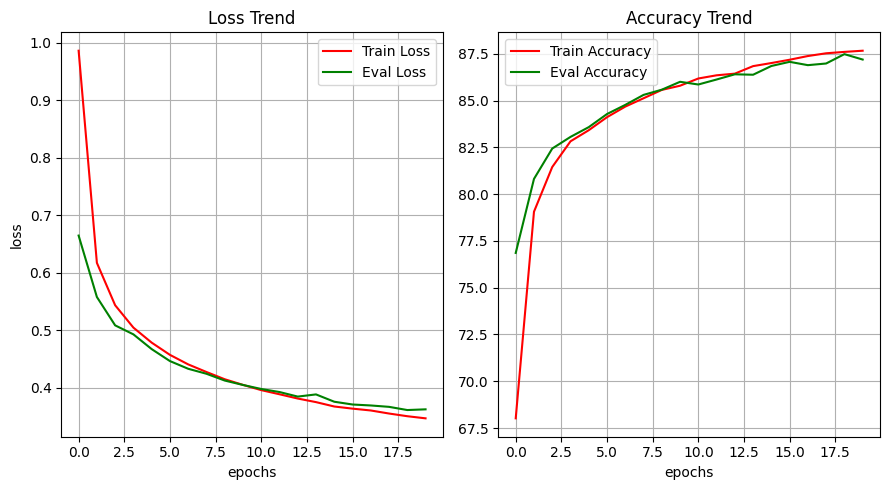

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

####################################################
plt.subplot(1, 2, 1)                # nrows=1, ncols=2, index=1
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, color='red', label='Train Loss')
plt.plot(eval_loss_list, color='green', label='Eval Loss')
plt.legend(loc='best')

####################################################
plt.subplot(1, 2, 2)                # nrows=1, ncols=2, index=2
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.grid()
plt.plot(train_accuracy_list, color='red', label='Train Accuracy')
plt.plot(eval_accuracy_list, color='green', label='Eval Accuracy')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# 손실 값과 정확도의 graph를 보면, 과적합(overfitting) 없이
# 학습 data와 검증 data 모두 loss는 감소하고, 정확도는 꾸준하게 증가하는 것을 볼 수 있다.

# 10.평가

In [ ]:
# model_evaluate() 와 동일한 code
def model_test(dataloader, model, loss_function, optimizer):

  # model을 평가(추론) mode로 ..
  # model의 parameter를 update 하지 않는 mode
  model.eval()

  # gradient를 계산하는 autograd engine을 비활성화한다.
  # 역전파(Backpropagation)에 필요한 메모리 등을 절약할 수 있어 계산 시 연산 속도가 빨라진다
  with torch.no_grad():
    # 검증 함수에는 역전파(Backpropagation) code가 없다.
    # 이 함수의 목적은 parameter를 학습을 하는 것이 아니라
    # 현재 model의 오차와 정확도를 알아내는 것이다.

    test_loss_sum = test_correct = test_total = 0

    total_test_batch = len(dataloader)

    for images, labels in dataloader:
      x_test = images.view(-1, 28, 28)
      y_test = labels

      outputs = model(x_test)
      loss = criterion(outputs, y_test)

      test_loss_sum += loss.item()

      test_total += y_test.size(0)
      test_correct += (torch.argmax(outputs, 1) == y_test).sum().item()

    test_avg_loss = test_loss_sum / total_test_batch
    test_avg_accuracy = 100 * test_correct / test_total

    return (test_avg_loss, test_avg_accuracy)

test_loss, test_accuracy = model_test(
      test_dataset_loader,
      model,
      criterion,
      optimizer)
print(f'test_loss={test_loss}, test_accuracy={test_accuracy}')
# test_loss=0.3799302401110387, test_accuracy=86.43

test_loss=0.3799302401110387, test_accuracy=86.43
